In [1]:
import uproot as ur
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()
os.listdir("pileup/")

['PileupReweight_Summer22.root',
 'PileupReweight_Summer22EE.root',
 'PileupReweight_Summer23.root',
 'PileupReweight_Summer23BPix.root',
 'RunII_2016_data.root']

In [3]:
hep.style.use(hep.style.CMS)

In [4]:
def getPUHists(fname):
    with ur.open("pileup/" + fname) as dfile:
        nominal = dfile["npu_nominal"]
        up = dfile["npu_up"]
        down = dfile["npu_down"]
    
    return nominal, up, down

In [5]:
def save_figure(fig, outputDirectory, name):
    """
    Saves a matplotlib figure in PDF and PNG.

    Parameters:
    ----------
    fig : matplotlib.figure.Figure
        The figure to be saved.
    outputDirectory : str
        Directory where the figure will be saved.
    name : str
        The base filename for the saved figure.

    Returns:
    -------
    None
    """

    os.makedirs(outputDirectory, exist_ok=True)
    fig.savefig(outputDirectory + name + ".pdf", bbox_inches="tight")
    fig.savefig(outputDirectory + name + ".png", bbox_inches="tight", dpi=300)
    fig.savefig(outputDirectory + name + ".pdf")
    fig.savefig(outputDirectory + name + ".png", dpi=300)
    print(outputDirectory + name + " Has been created")

In [6]:
def plotPUHists(nom_hist, up_hist, down_hist, name):
    fig, axs = plt.subplots()
    hep.histplot(nom_hist, label="nominal", ax=axs)
    hep.histplot(up_hist, label="up", ax=axs)
    hep.histplot(down_hist, label="down", ax=axs)
    
    axs.legend(frameon=False, loc="upper right", ncols=1)
    axs.set_ylabel("Density")
    axs.set_title("Pileup Reweighting")
    axs.set_xlabel("PU Profile")
    axs.set_yscale('log')
    plt.show()
    save_figure(fig, "data_correction_plots/pileup/", name)

In [7]:
nominal_pu_hists = []
up_pu_hists = []
down_pu_hists = []
file_list = []
    
for file in os.listdir("pileup/"):
    if file[0]=='R':
        continue
    file_list.append(file)
    ntemp, utemp, dtemp = getPUHists(file)
    nominal_pu_hists.append(ntemp.to_numpy())
    up_pu_hists.append(utemp.to_numpy())
    down_pu_hists.append(dtemp.to_numpy())

/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-6c4922f4e317e74c4b82416c41722d10/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-6c4922f4e317e74c4b82416c41722d10/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


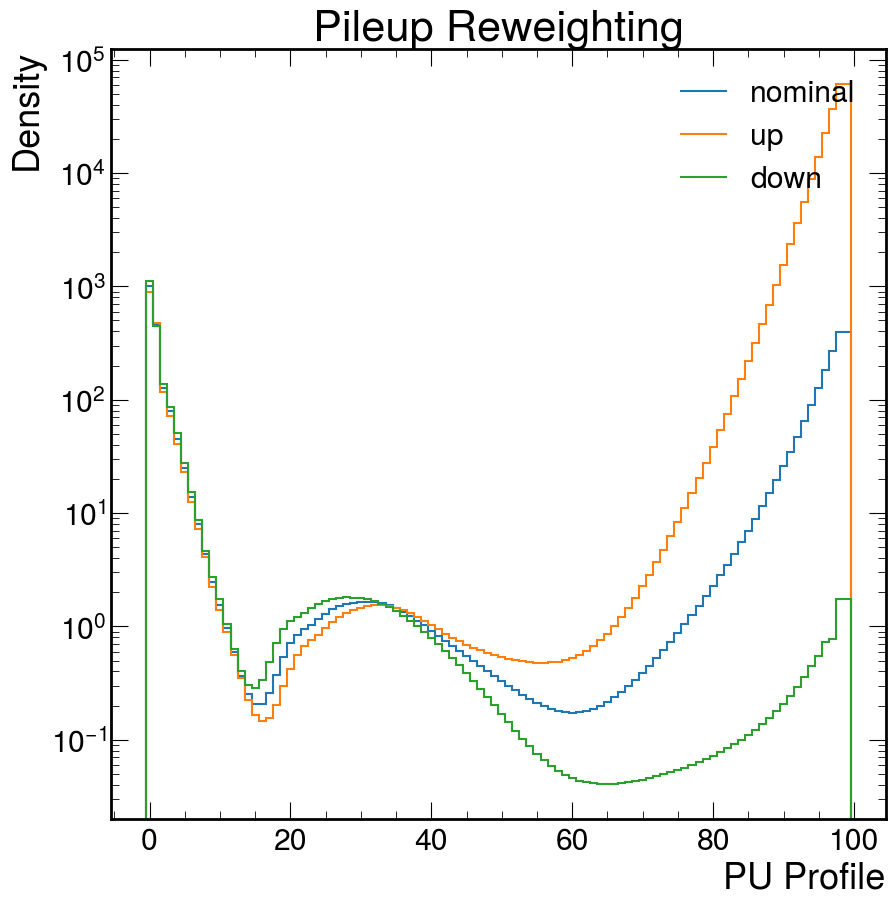

data_correction_plots/pileup/PileupReweight_Summer22 Has been created


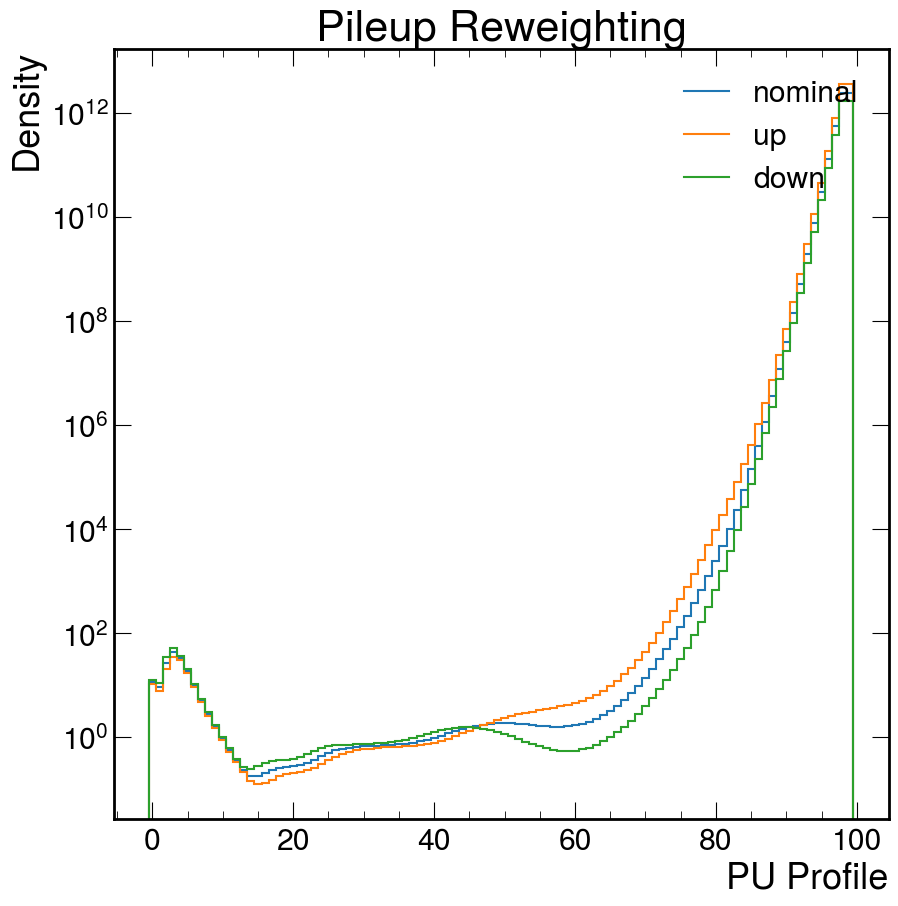

data_correction_plots/pileup/PileupReweight_Summer22EE Has been created


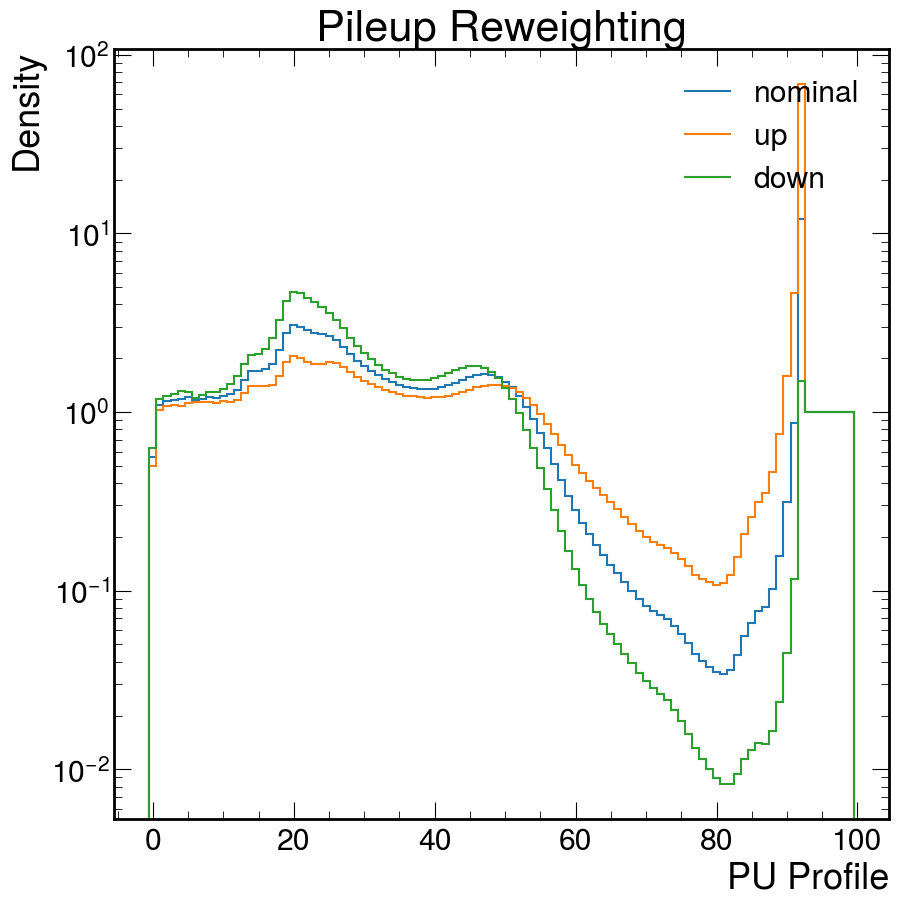

data_correction_plots/pileup/PileupReweight_Summer23 Has been created


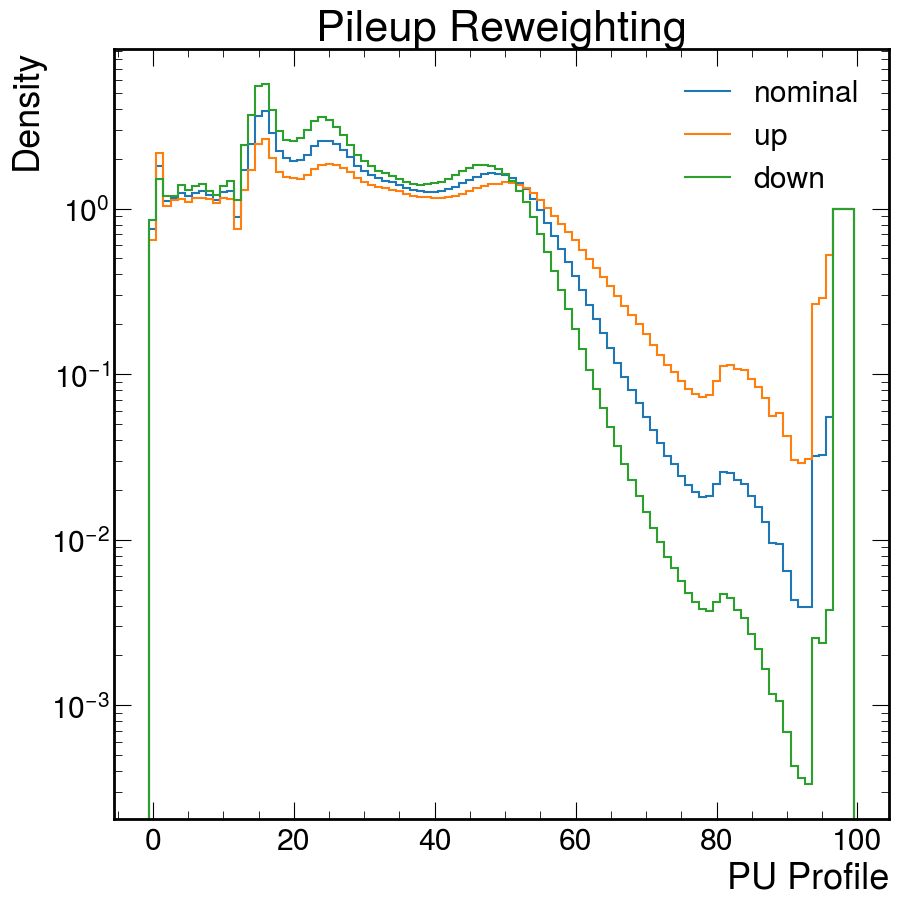

data_correction_plots/pileup/PileupReweight_Summer23BPix Has been created


In [8]:
for i in range(0,len(nominal_pu_hists)):
    plotPUHists(nominal_pu_hists[i], up_pu_hists[i], down_pu_hists[i], file_list[i].split('.')[0])